In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
kiwo = pd.read_csv('/workspaces/test02/kiwo.csv')
sales = pd.read_csv('/workspaces/test02/umsatzdaten_gekuerzt.csv')
wetter = pd.read_csv('/workspaces/test02/wetter.csv')

In [5]:
# Merge the dataframes
df = pd.merge(sales, kiwo, on='Datum', how='left')
df = pd.merge(df, wetter, on='Datum', how='left')
df

,id,Datum,Warengruppe,Umsatz,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode
0,1307011,2013-07-01,1,148.828353,NaN,6.0,17.8375,15.0,20.0
1,1307021,2013-07-02,1,159.793757,NaN,3.0,17.3125,10.0,NaN
2,1307031,2013-07-03,1,111.885594,NaN,7.0,21.0750,6.0,61.0
3,1307041,2013-07-04,1,168.864941,NaN,7.0,18.8500,7.0,20.0
4,1307051,2013-07-05,1,171.280754,NaN,5.0,19.9750,12.0,NaN
...,...,...,...,...,...,...,...,...,...
9329,1712216,2017-12-21,6,87.471228,NaN,7.0,6.2375,10.0,21.0
9330,1712226,2017-12-22,6,71.911652,NaN,7.0,5.7625,9.0,10.0
9331,1712236,2017-12-23,6,84.062223,NaN,7.0,7.8000,19.0,61.0
9332,1712246,2017-12-24,6,60.981969,NaN,7.0,8.1125,16.0,61.0


In [9]:
# Calculate the total daily sales - group by date
df['Datum'] = pd.to_datetime(sales['Datum'])
df['total_sales'] = df.groupby('Datum')['Umsatz'].transform('sum')
df

,id,Datum,Warengruppe,Umsatz,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,total_sales
0,1307011,2013-07-01,1,148.828353,NaN,6.0,17.8375,15.0,20.0,1269.249107
1,1307021,2013-07-02,1,159.793757,NaN,3.0,17.3125,10.0,NaN,1430.008397
2,1307031,2013-07-03,1,111.885594,NaN,7.0,21.0750,6.0,61.0,1124.274894
3,1307041,2013-07-04,1,168.864941,NaN,7.0,18.8500,7.0,20.0,1184.309567
4,1307051,2013-07-05,1,171.280754,NaN,5.0,19.9750,12.0,NaN,1288.023060
...,...,...,...,...,...,...,...,...,...,...
9329,1712216,2017-12-21,6,87.471228,NaN,7.0,6.2375,10.0,21.0,801.042635
9330,1712226,2017-12-22,6,71.911652,NaN,7.0,5.7625,9.0,10.0,782.890863
9331,1712236,2017-12-23,6,84.062223,NaN,7.0,7.8000,19.0,61.0,975.137474
9332,1712246,2017-12-24,6,60.981969,NaN,7.0,8.1125,16.0,61.0,1271.217280


In [8]:
df[df["Datum"]== "2013-07-01"]

,id,Datum,Warengruppe,Umsatz,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,total_sales
0,1307011,2013-07-01,1,148.828353,NaN,6.0,17.8375,15.0,20.0,1269.249107
1819,1307012,2013-07-01,2,535.856285,NaN,6.0,17.8375,15.0,20.0,1269.249107
3638,1307013,2013-07-01,3,201.198426,NaN,6.0,17.8375,15.0,20.0,1269.249107
5457,1307014,2013-07-01,4,65.890169,NaN,6.0,17.8375,15.0,20.0,1269.249107
7223,1307015,2013-07-01,5,317.475875,NaN,6.0,17.8375,15.0,20.0,1269.249107


In [10]:
# Descriptive statistics   
df.describe()

,id,Datum,Warengruppe,Umsatz,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,total_sales
count,9.334000e+03,9334,9334.000000,9334.000000,223.0,9264.000000,9318.000000,9318.000000,7009.000000,9334.000000
mean,1.559311e+06,2016-01-13 23:56:27.100921344,3.088172,206.749044,1.0,4.720747,12.028483,10.974780,36.900128,1055.923795
min,1.307011e+06,2013-07-01 00:00:00,1.000000,7.051201,1.0,0.000000,-8.475000,3.000000,0.000000,525.973832
25%,1.410123e+06,2014-10-12 00:00:00,2.000000,96.897441,1.0,3.000000,6.237500,8.000000,10.000000,848.128265
50%,1.601102e+06,2016-01-10 00:00:00,3.000000,161.900831,1.0,6.000000,11.625000,10.000000,28.000000,994.046049
75%,1.704223e+06,2017-04-22 00:00:00,4.000000,280.644663,1.0,7.000000,17.962500,13.000000,61.000000,1223.119495
max,1.807315e+06,2018-07-31 00:00:00,6.000000,1879.461831,1.0,8.000000,31.437500,35.000000,95.000000,3156.413344
std,1.512503e+05,NaN,1.489002,144.545189,0.0,2.646273,7.232829,4.131974,27.095884,287.503057


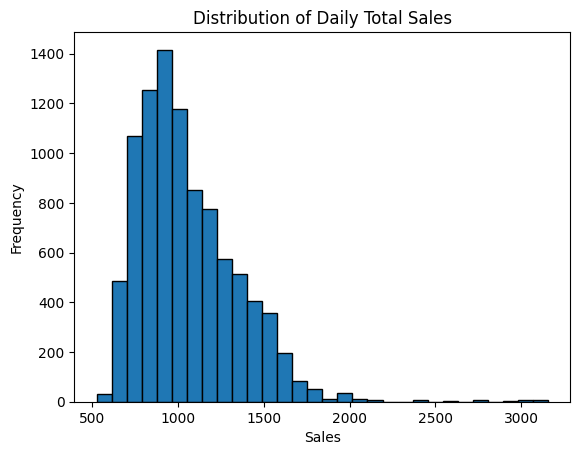

In [17]:
# Distribution of daily total sales
plt.hist(df['total_sales'], bins=30, edgecolor='black')
plt.title('Distribution of Daily Total Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

1. Distribution of daily total sales is right-skewed, suggesting outliers - occational high sales days.
2. Most data fall between 700 - 1400 


<Figure size 1000x600 with 0 Axes>

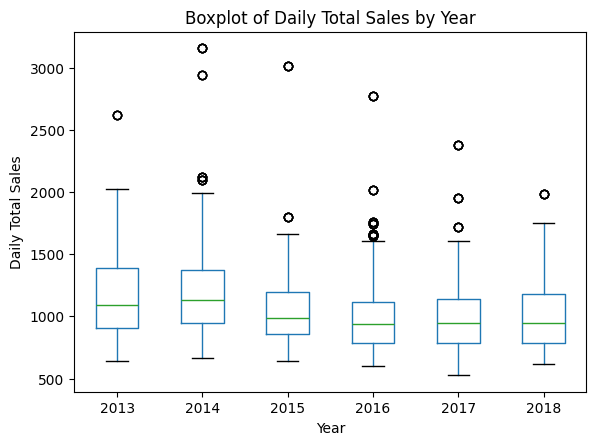

In [18]:
# Create boxplot for daily total sales by year
df['Jahr'] = pd.to_datetime(df['Datum']).dt.year
plt.figure(figsize=(10, 6))
df.boxplot(column='total_sales', by='Jahr', grid=False)
plt.title('Boxplot of Daily Total Sales by Year')
plt.suptitle('')
plt.xlabel('Year')
plt.ylabel('Daily Total Sales')
plt.show()

1. Central tendency 
* Medians of daily total sales are relatively stable across years, with a slight dip around 2015 - 2017. 
* Core sales performance on a typical day was quite consistent, but slightly stronger in early years.

2. Variablity 
2.1. IQR
* 2013-2014 show wider boxes, while 2016-2017 are narrower
* There were more fluctuation in mid-range sales early on, while the performance got more stable in later years 
2.2. Range 
* 2013-2014 the whiskers were higher, while later years they were shorter and lower
* There was a broader spread of sales activity in earlier years, and sales became more predictable in later years

3. Outliers
* There were outliers every year, which were generally above 2000 in daily total sales, but 2014-2016 seems to have more extreme values
* There are regularly high-sales days

4. Year-by-year comparison
* Business shows a quite consistent in operations due to similar structure of sales performance across years
* The demand base seems to be steady due to the stable overall typical sales level
* After the first 2 years, the decreased variability suggests increased consistency in sales performance.   



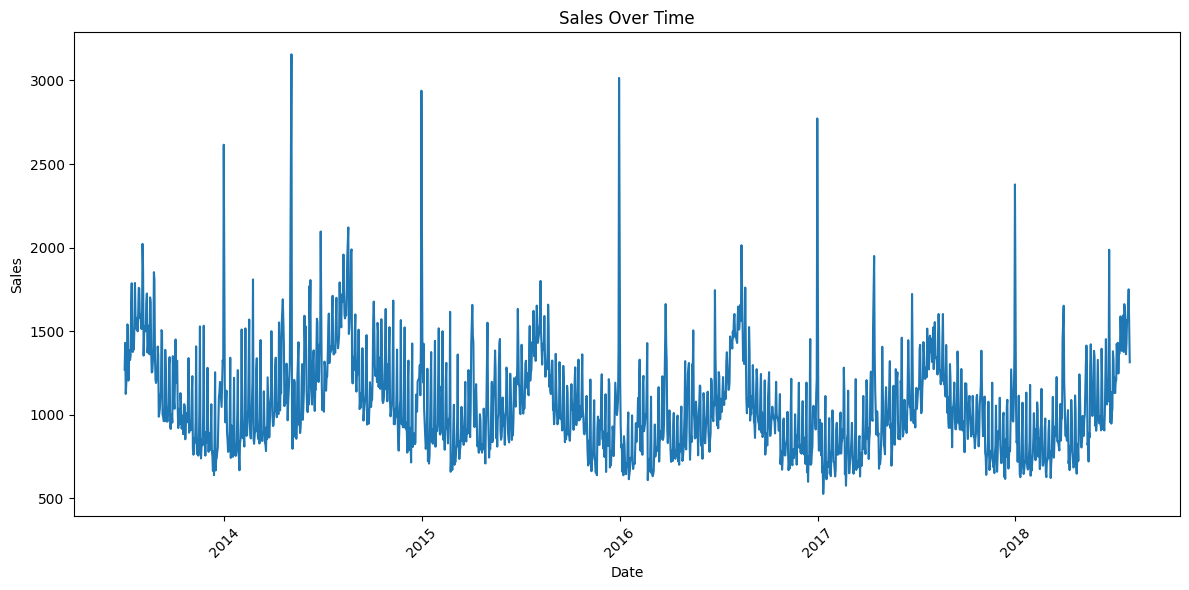

In [22]:
# Plot a timeseries of sales
df.sort_values('Datum', inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(df['Datum'], df['total_sales'])
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Patterns
* Business is seasonal with several extreme peaks with the highest at the end of every year
* Stable trend with no obvious upward or downward drift over years

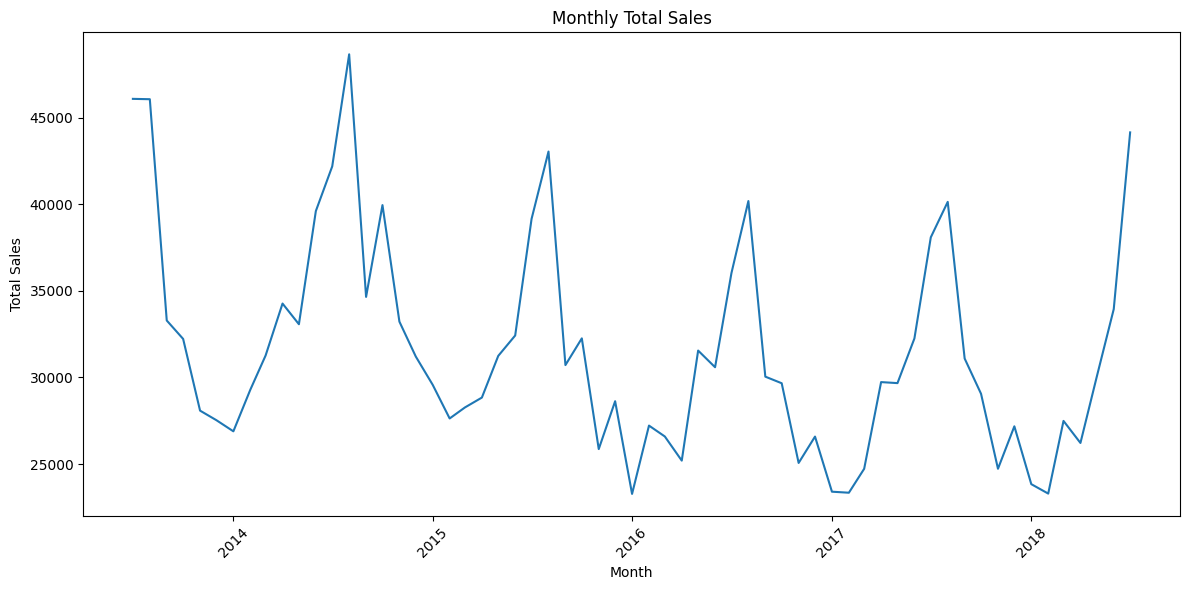

In [28]:
# Create a timeseries for the aggregated sales data (monthly) - Xaxis shows the month e.g. 2020-01
df['Datum'] = pd.to_datetime(df['Datum'])
df['YearMonth'] = df['Datum'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth')['Umsatz'].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].dt.to_timestamp()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['YearMonth'], monthly_sales['Umsatz'])
plt.title('Monthly Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

More smooth than daily view > Capture macro- trends
* Strong repeating seasonal highs: Annual cycles with highest sales in June-July 
* Variability ~20000
* Long-term trend: No strong linear trend

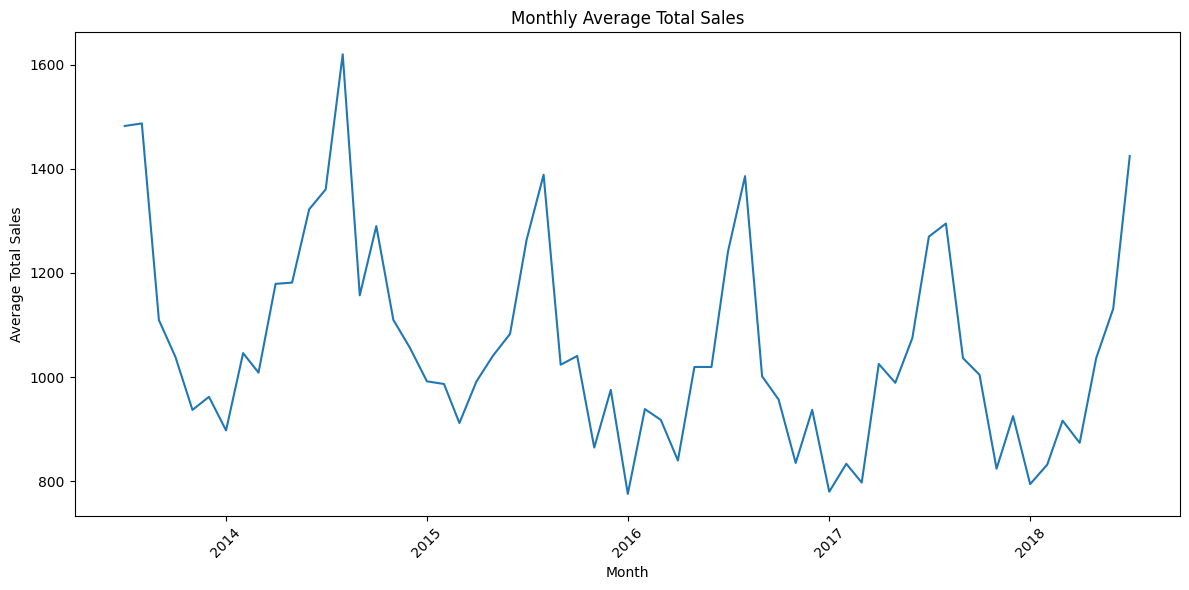

In [29]:
# Create a timeseries plot of the average total daily sales data (monthly) - Xaxis shows the month e.g. 2020-01
monthly_avg_sales = df.groupby('YearMonth')['total_sales'].mean().reset_index()
monthly_avg_sales['YearMonth'] = monthly_avg_sales['YearMonth'].dt.to_timestamp()
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_sales['YearMonth'], monthly_avg_sales['total_sales'])
plt.title('Monthly Average Total Sales')
plt.xlabel('Month')
plt.ylabel('Average Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

More smooth than daily view > Capture macro- trends but controls for different month lengths
* Clear seasonal trend with consistent drops after peak months (June-July)
* Monthly averages seems to be consistent in the range of 20000 (Consistent, resilient, season-dependent)